In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from datetime import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pickle.load(open("df.pkl", 'rb'))

In [5]:
df.shape

(1482749, 35)

In [6]:
def get_bedrooms(housing):
    """parse amount of bedrooms from 'housing' field"""
    bedrooms = None
    # bedrooms
    match = re.search(r'(\d+)br.*', housing)
    if match:
        bedrooms = int(match.group(1))
    return bedrooms

In [7]:
df.dropna(subset=['parsed_price', "parsed_housing"], inplace=True)

In [8]:
df["price"] = df["parsed_price"].apply(float)

In [9]:
df['bedrooms'] = df["parsed_housing"].apply(get_bedrooms)

In [10]:
df.head()

,parsed_map_address,parsed_postingtitletext,added,PostUrl,PostTitle,parsed_price,parsed_price_text,parsed_housing,PostContent,parsed_data_longitude,...,parsed_wd,parsed_type,parsed_laundryb,parsed_nthumbs,parsed_garagea,parsed_laundrys,parsed_garaged,parsed_catsok,price,bedrooms
0,1249 Crescent Terrace,$3150 / 2br - 1300ft2 - Sunset Oaks Townhome- ...,1538706586266,https://sfbay.craigslist.org/sby/apa/d/sunset-...,simulated,3150,$3150,2br,simulated,-122.026428,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3150.0,2.0
1,2205 E Leland Rd,$1769 / 2br - 875ft2 - ❄ Pittsburg Apartment L...,1539451812116,https://sfbay.craigslist.org/eby/apa/d/pittsbu...,simulated,1769,$1769,2br - 875ft2,simulated,-121.864673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1769.0,2.0
2,375 Pope Street,$3000 / 2br - 1800ft2 - 2 Bedroom 1 Bath 1 Car...,1538947757137,https://sfbay.craigslist.org/sfc/apa/d/2-bedro...,simulated,3000,$3000,2br - 1800ft2,simulated,-122.439706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3000.0,2.0
3,None,"$5,000 / 3br - 1462ft2 - Fully furnished house...",1601972662113,https://sfbay.craigslist.org/nby/apa/d/novato-...,NaN,5000,"$5,000",3br - 1462ft2,NaN,-122.5714,...,False,house,True,13,False,False,False,False,5000.0,3.0
4,2436 Baltic Dr,$2150 / 3br - 1200ft2 - Updated 1200 SQ FT 3 B...,1585287116209,https://sfbay.craigslist.org/eby/apa/d/fairfie...,simulated,2150,$2150,3br - 1200ft2,simulated,-122.019156,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2150.0,3.0


In [11]:
df.columns

Index(['parsed_map_address', 'parsed_postingtitletext', 'added', 'PostUrl',
       'PostTitle', 'parsed_price', 'parsed_price_text', 'parsed_housing',
       'PostContent', 'parsed_data_longitude', 'parsed_attrs',
       'parsed_district', 'parsed_map_link', 'parsed_bedrooms',
       'parsed_postingbody', 'parsed_page_head', 'parsed_thumbs', 'FeedTitle',
       'intid', 'parsed_titletextonly', 'parsed_data_latitude', 'FeedUrl',
       'PostPublished', 'parsed_notices', 'parsed_dogsok', 'parsed_area',
       'parsed_furnished', 'parsed_wd', 'parsed_type', 'parsed_laundryb',
       'parsed_nthumbs', 'parsed_garagea', 'parsed_laundrys', 'parsed_garaged',
       'parsed_catsok', 'price', 'bedrooms'],
      dtype='object')

In [12]:
# cleanup duplicates
# do not include next columns
# intid - uniq id
# added -  may be added different time
# PostUrl - may use different urls
# parsed_thumbs - lists are unhashable
# parsed_attrs - lists are unhashable
# parsed_notices - lists are unhashable

df.drop_duplicates(subset=[
    'parsed_map_address',
    'parsed_postingtitletext', 
    'parsed_price', 
    'parsed_housing',
    'parsed_data_longitude',
    'parsed_district',
    'parsed_map_link',
    'parsed_bedrooms',
    'parsed_postingbody',
    'parsed_page_head',
    'parsed_titletextonly', 
    'parsed_data_latitude',
    'parsed_dogsok', 
    'parsed_area',
    'parsed_furnished',
    'parsed_wd',
    'parsed_type',
    'parsed_laundryb',
    'parsed_nthumbs',
    'parsed_garagea',
    'parsed_laundrys',
    'parsed_garaged',
    'parsed_catsok',
])
df.shape

(1420630, 37)

In [13]:
df.dropna(subset=["bedrooms"], inplace=True)

In [14]:
df.shape

(1324298, 37)

In [15]:
pdf = df.loc[:, ["added", "price", "bedrooms", "parsed_district"]]

In [16]:
del df

In [17]:
pdf.describe()

,price,bedrooms
count,1.324298e+06,1.324298e+06
mean,2.265351e+14,1.849919e+00
std,2.606924e+17,9.480669e-01
min,0.000000e+00,1.000000e+00
25%,2.195000e+03,1.000000e+00
50%,2.700000e+03,2.000000e+00
75%,3.500000e+03,2.000000e+00
max,3.000000e+20,1.230000e+02


In [18]:
pdf["bedrooms"].unique()

array([  2.,   3.,   1.,   8.,   4.,   5.,   6.,   7., 123.])

In [19]:
def stodatetime(s):
    return datetime.utcfromtimestamp(int(s)/1000)

In [20]:
pdf.loc[:,"time"] = pdf["added"].apply(stodatetime)

In [21]:
pdf.describe()

,price,bedrooms
count,1.324298e+06,1.324298e+06
mean,2.265351e+14,1.849919e+00
std,2.606924e+17,9.480669e-01
min,0.000000e+00,1.000000e+00
25%,2.195000e+03,1.000000e+00
50%,2.700000e+03,2.000000e+00
75%,3.500000e+03,2.000000e+00
max,3.000000e+20,1.230000e+02


In [22]:
now = datetime.utcnow()
def days_ago(t):
    delta = now - t
    return -1 * delta.days

def weeks_ago(t):
    return days_ago(t) // 7

def months_ago(t):
    return days_ago(t) // 30

In [23]:
pdf["days_ago"] = pdf["time"].apply(days_ago)

In [24]:
pdf["weeks_ago"] = pdf["time"].apply(weeks_ago)

In [25]:
pdf["months_ago"] = pdf["time"].apply(months_ago)

In [26]:
pdf.describe()

,price,bedrooms,days_ago,weeks_ago,months_ago
count,1.324298e+06,1.324298e+06,1.324298e+06,1.324298e+06,1.324298e+06
mean,2.265351e+14,1.849919e+00,-3.358930e+02,-4.841288e+01,-1.168536e+01
std,2.606924e+17,9.480669e-01,2.562364e+02,3.660438e+01,8.537719e+00
min,0.000000e+00,1.000000e+00,-9.760000e+02,-1.400000e+02,-3.300000e+01
25%,2.195000e+03,1.000000e+00,-4.160000e+02,-6.000000e+01,-1.400000e+01
50%,2.700000e+03,2.000000e+00,-2.850000e+02,-4.100000e+01,-1.000000e+01
75%,3.500000e+03,2.000000e+00,-1.470000e+02,-2.100000e+01,-5.000000e+00
max,3.000000e+20,1.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00


In [27]:
pdf["price"].describe()

count    1.324298e+06
mean     2.265351e+14
std      2.606924e+17
min      0.000000e+00
25%      2.195000e+03
50%      2.700000e+03
75%      3.500000e+03
max      3.000000e+20
Name: price, dtype: float64

In [28]:
pdf.head()

,added,price,bedrooms,parsed_district,time,days_ago,weeks_ago,months_ago
0,1538706586266,3150.0,2.0,sunnyvale,2018-10-05 02:29:46.266,-823,-118,-28
1,1539451812116,1769.0,2.0,"Pittsburg, CA",2018-10-13 17:30:12.116,-814,-117,-28
2,1538947757137,3000.0,2.0,excelsior / outer mission,2018-10-07 21:29:17.137,-820,-118,-28
3,1601972662113,5000.0,3.0,santa rosa,2020-10-06 08:24:22.113,-90,-13,-3
4,1585287116209,2150.0,3.0,fairfield / vacaville,2020-03-27 05:31:56.209,-283,-41,-10


In [29]:
pdf.loc[:,"bedrooms_str"] = pdf["bedrooms"].apply(lambda x: f"{int(x)}br")

In [30]:
pdf["bedrooms_str"]

0          2br
1          2br
2          2br
3          3br
4          3br
          ... 
1482744    1br
1482745    3br
1482746    1br
1482747    1br
1482748    1br
Name: bedrooms_str, Length: 1324298, dtype: object

In [31]:
acc = pdf[(pdf["days_ago"] >- 300) & (pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

In [32]:
acc.shape

(659429, 9)

In [33]:
acc.describe()

,price,bedrooms,days_ago,weeks_ago,months_ago
count,659429.000000,659429.000000,659429.000000,659429.000000,659429.000000
mean,2804.482413,1.676038,-150.001115,-21.859058,-5.489847
std,998.650486,0.705335,88.534002,12.648521,2.938420
min,0.000000,1.000000,-299.000000,-43.000000,-10.000000
25%,2150.000000,1.000000,-229.000000,-33.000000,-8.000000
50%,2600.000000,2.000000,-154.000000,-22.000000,-6.000000
75%,3295.000000,2.000000,-71.000000,-11.000000,-3.000000
max,7999.000000,3.000000,0.000000,0.000000,0.000000


In [34]:
acc["bedrooms_str"].unique()

array(['3br', '1br', '2br'], dtype=object)

In [35]:
#g = sns.relplot(x="days_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
#g.fig.set_figwidth(12)
#g.fig.set_figheight(5)

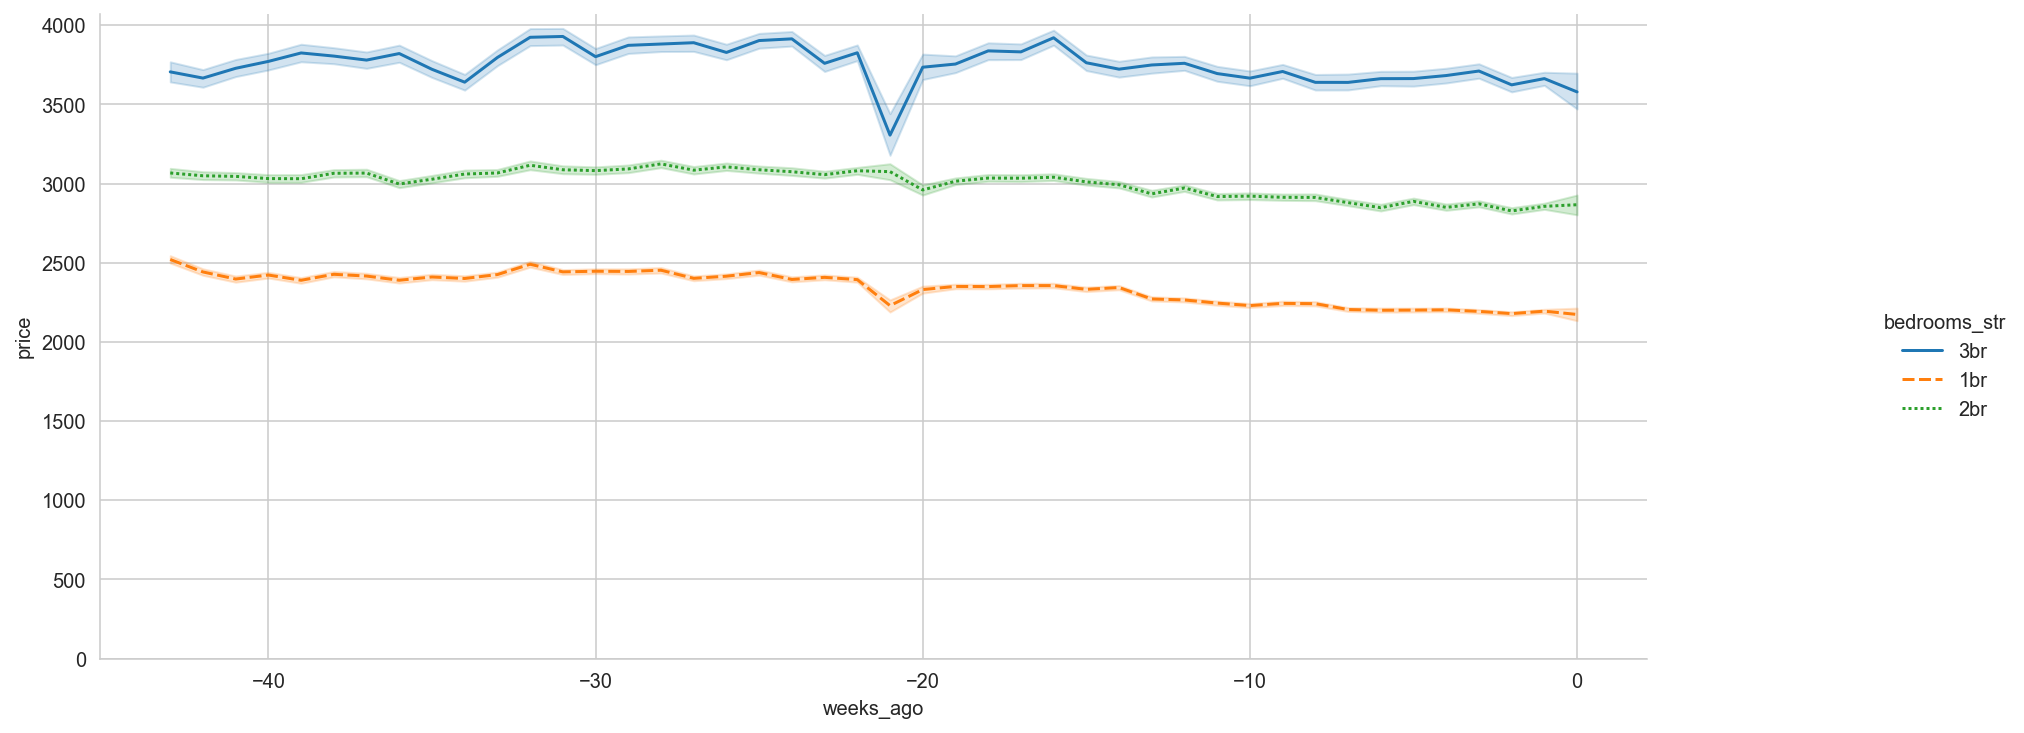

In [36]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

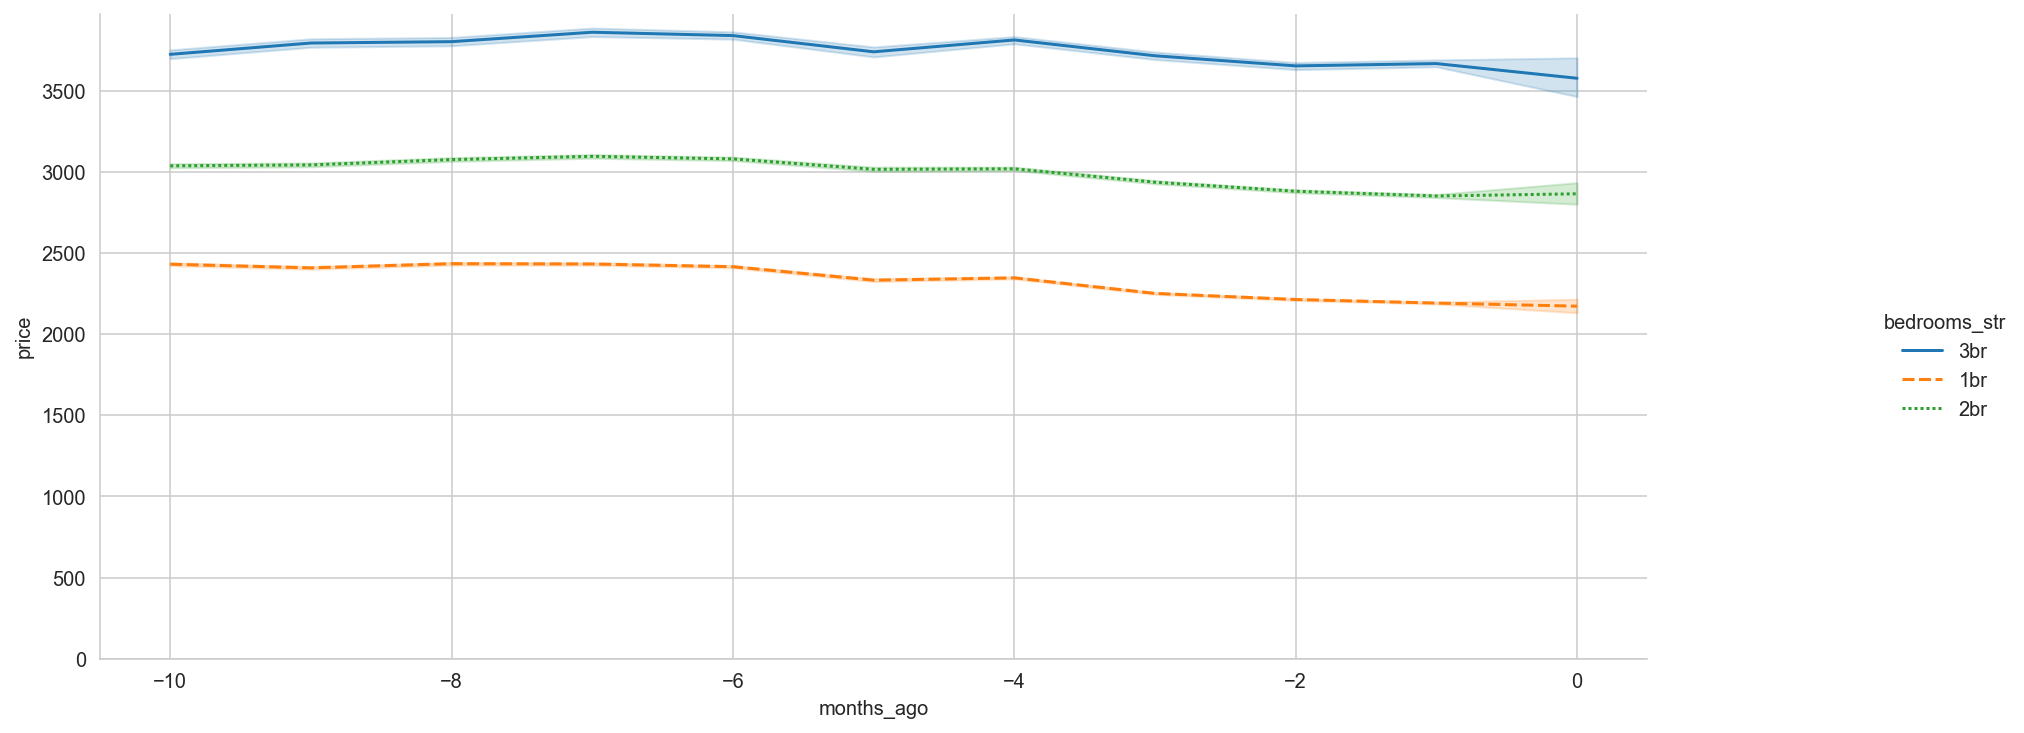

In [37]:
g = sns.relplot(x="months_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

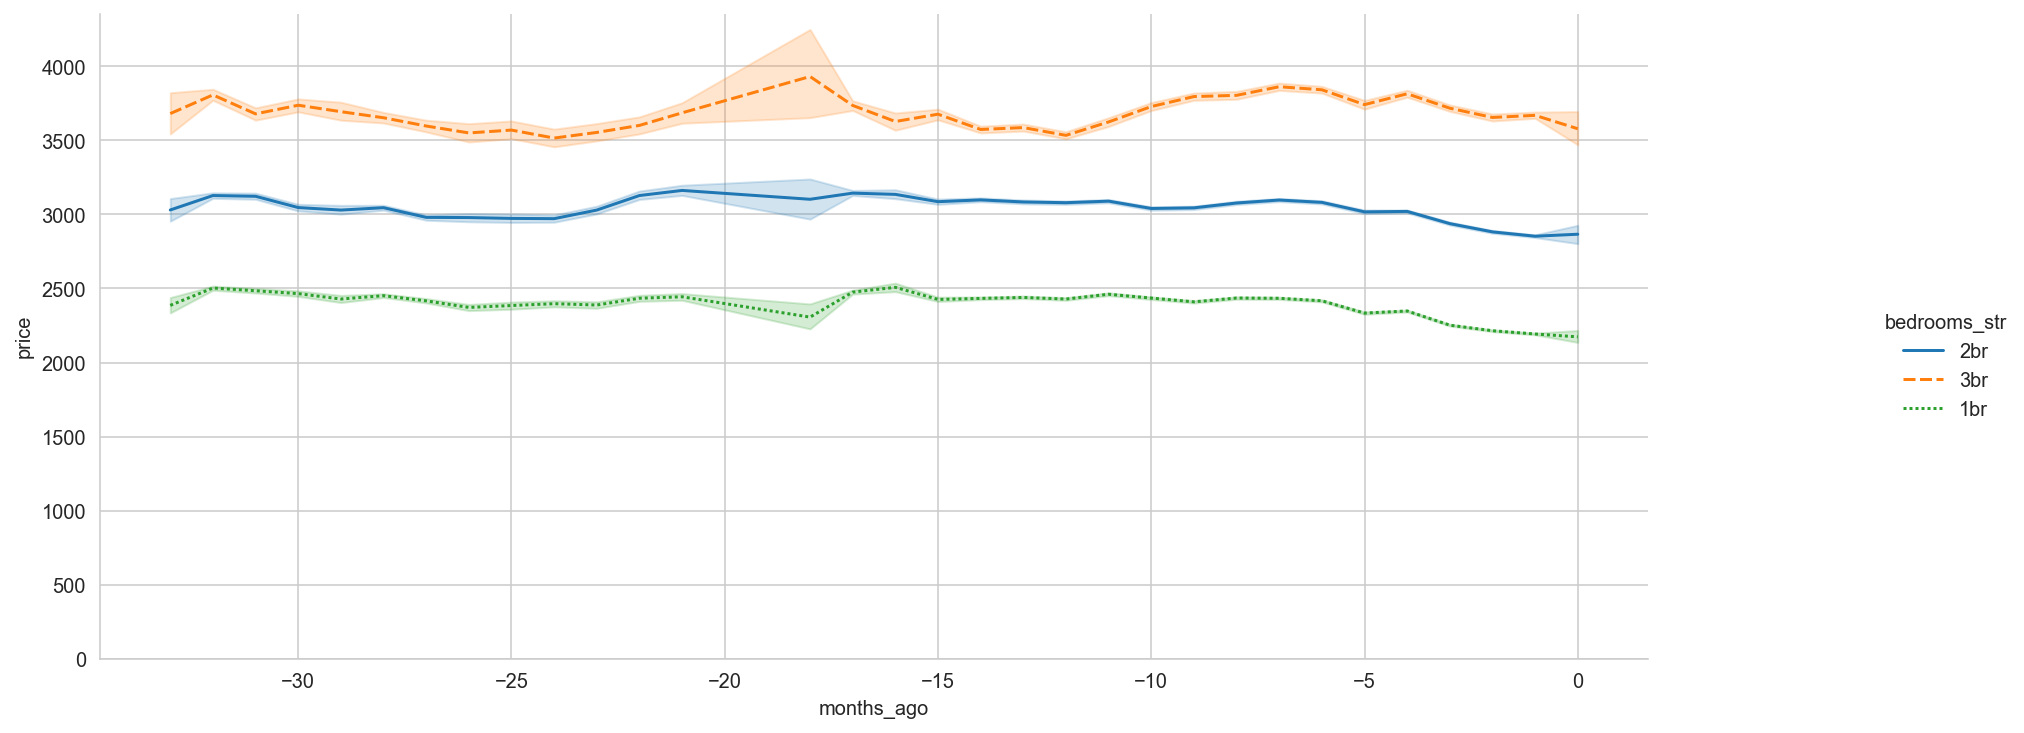

In [38]:
dag_data = pdf[(pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

g = sns.relplot(x="months_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=dag_data);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

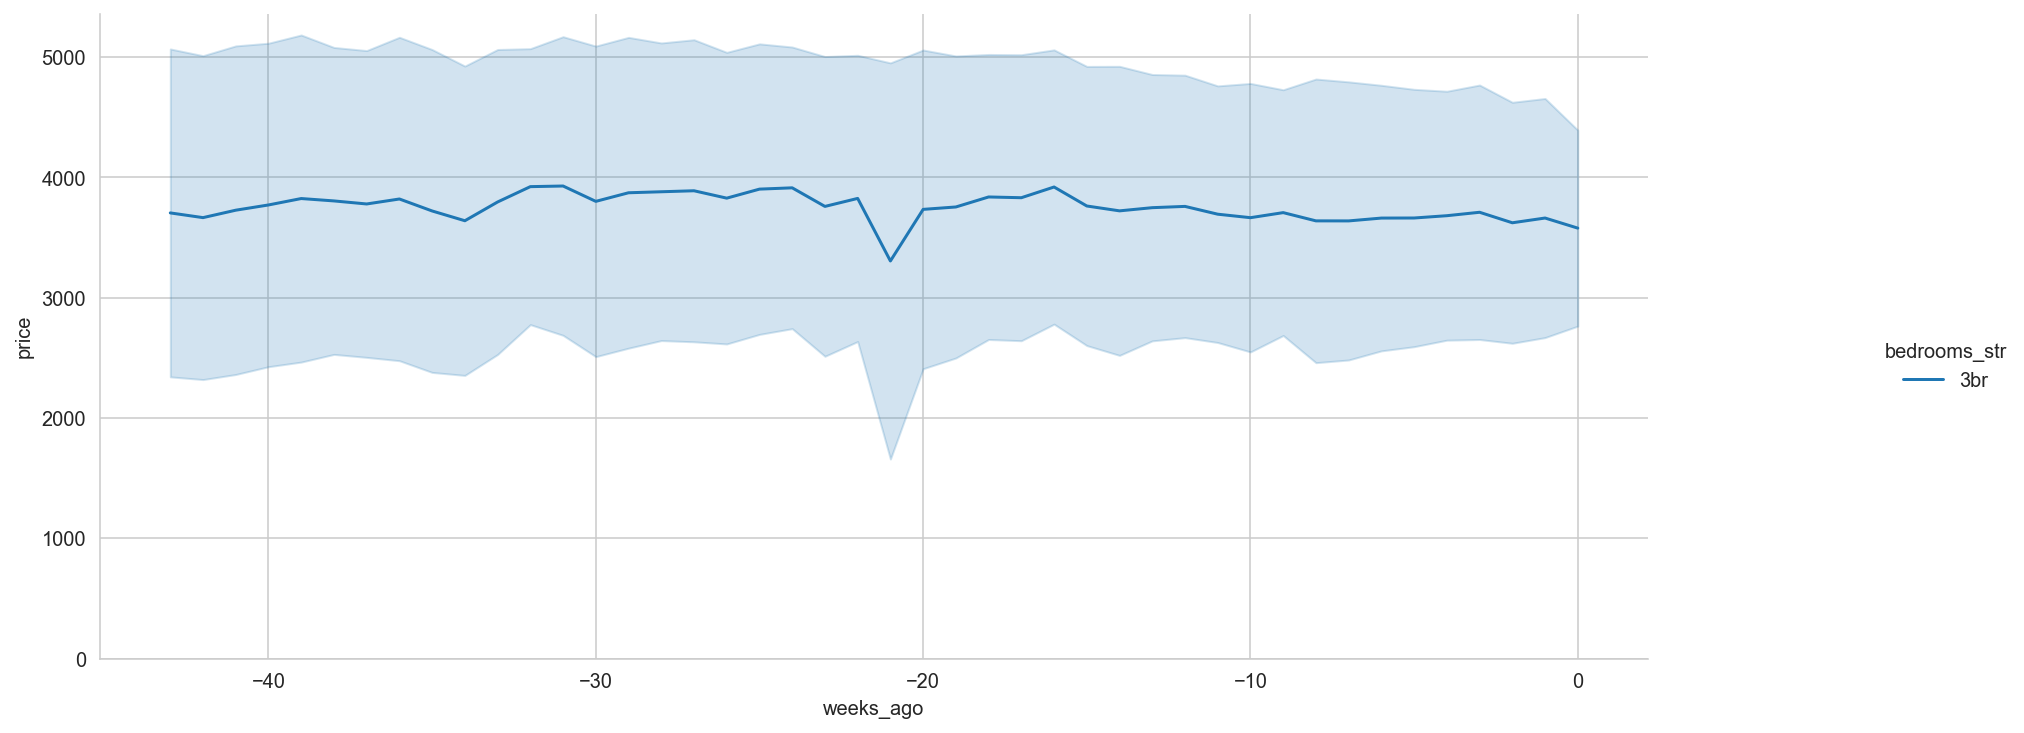

In [39]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="3br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

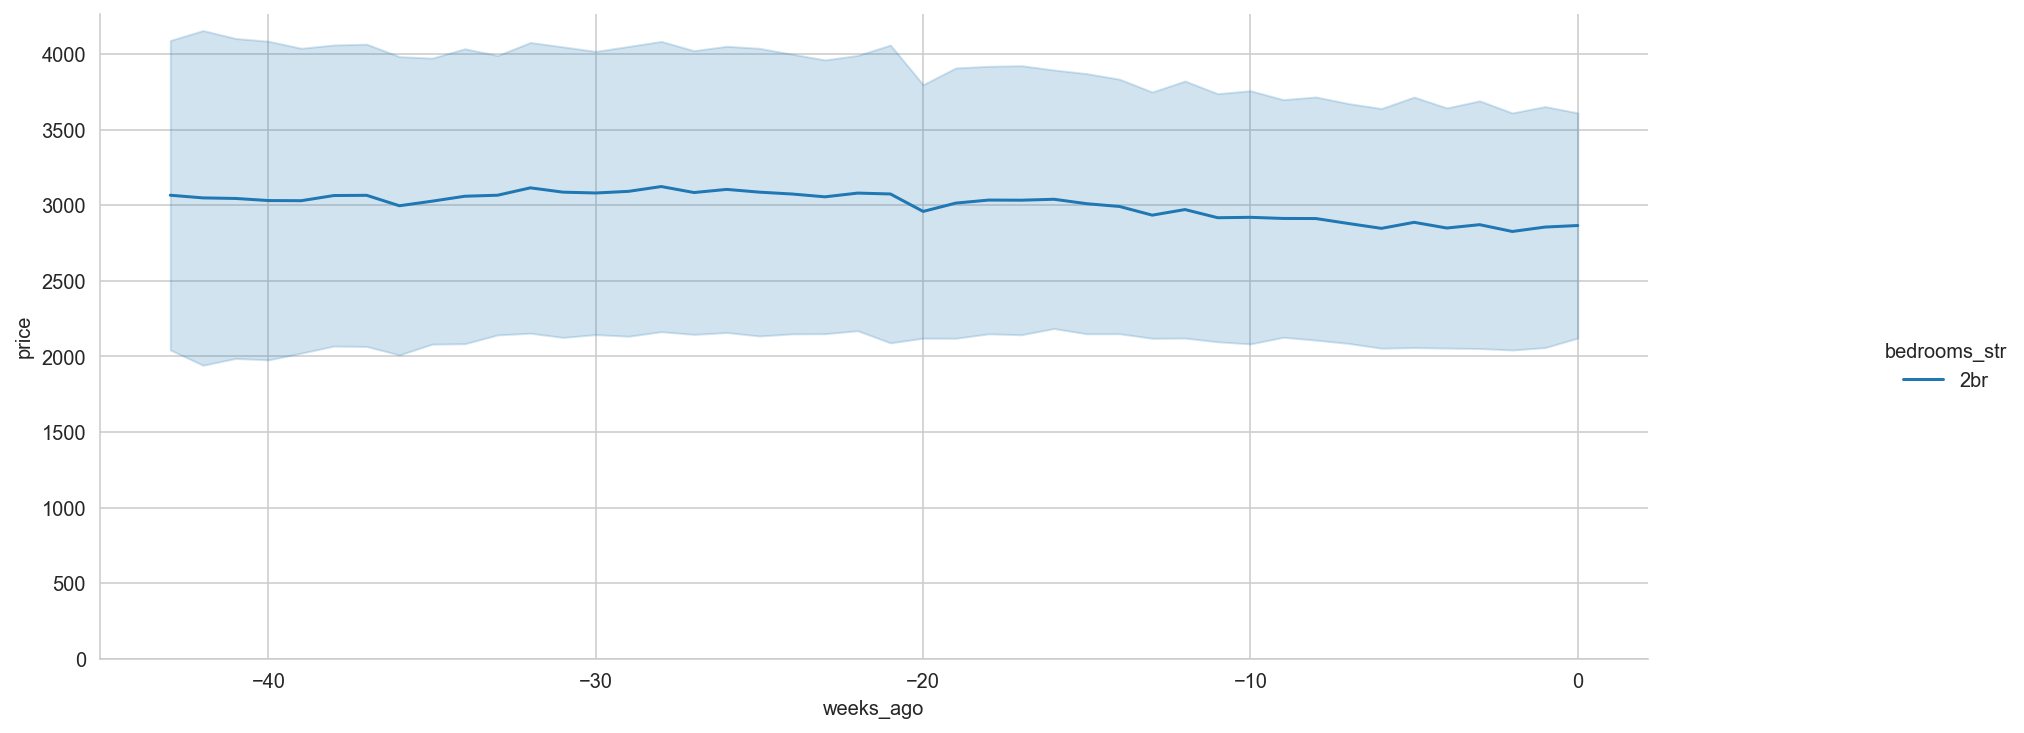

In [40]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="2br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

In [ ]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="1br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

In [ ]:
sns.distplot(acc["days_ago"])

In [ ]:
sns.distplot(acc["weeks_ago"])

In [ ]:
sns.distplot(acc["months_ago"])

In [ ]:
acc["parsed_district"].describe()

In [ ]:
pdf["added"].min()

In [ ]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=pdf[(pdf["bedrooms_str"]=="2br") & (pdf["price"] < 8000) ])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));